In [7]:
# Import necessary libraries
from google.cloud import bigquery
import pandas as pd

# Set up the BigQuery client
client = bigquery.Client.from_service_account_json('C:\\Users\\GalipŞahin\\Desktop\\Kişisel\\Dream\\galipsahin15.json')

# Define the query to count the total number of rows in the dataset_level_end table
count_query = """
SELECT COUNT(*) as total_rows FROM `casedreamgames.Analytics.dataset_level_end`
"""

# Run the query and convert the result to a DataFrame
total_rows_df = client.query(count_query).to_dataframe()

# Get the total number of rows
total_rows = total_rows_df['total_rows'][0]

# Calculate the sample size as 1/10,000 of the total rows
sample_size = total_rows // 100000

# Define the query to load the dataset_level_end table and randomly sample 1/10,000 of the rows
sample_query = f"""
SELECT * FROM `casedreamgames.Analytics.dataset_level_end`
WHERE RAND() < {1/sample_size}
"""

# Run the query and convert the result to a DataFrame
sampled_df = client.query(sample_query).to_dataframe()

# Examine the sampled data
print(sampled_df.head())

# Print the number of rows sampled
print(f"A total of {sampled_df.shape[0]} rows have been sampled.")


                        event_time          user_id platform  level status  \
0 2021-05-11 12:36:48.727000+00:00  hft3152246497rm  android    101    win   
1 2021-05-24 11:52:49.698000+00:00  hft3154345100rm      ios    141    win   
2 2021-06-09 11:50:39.863000+00:00  hft3152990303rm      ios    382   fail   
3 2021-05-11 21:34:44.231000+00:00  hft3153068308rm      ios      3    win   
4 2021-05-16 11:17:36.410000+00:00  hft3153557378rm  android     41    win   

   time_spent  moves_made  moves_left  
0        45.0          14          16  
1        22.0           8          21  
2       139.0          45           0  
3        30.0          13          12  
4        26.0           8          19  
A total of 100256 rows have been sampled.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100256 entries, 0 to 100255
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   event_time  100256 non-null  datetime64[ns, UTC]
 1   user_id     100256 non-null  object             
 2   platform    100256 non-null  object             
 3   level       100256 non-null  Int64              
 4   status      100256 non-null  object             
 5   time_spent  100256 non-null  float64            
 6   moves_made  100256 non-null  Int64              
 7   moves_left  100256 non-null  Int64              
dtypes: Int64(3), datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 6.4+ MB
None
            level     time_spent  moves_made  moves_left
count    100256.0  100256.000000    100256.0    100256.0
mean   229.728286      98.418578   29.770597    2.036886
std      175.8015      68.927950    6.124264    4.012699
min           1.0       2.00000

C:\Users\GalipŞahin\AppData\Local\Temp\ipykernel_108\1904966786.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sampled_df.corr()


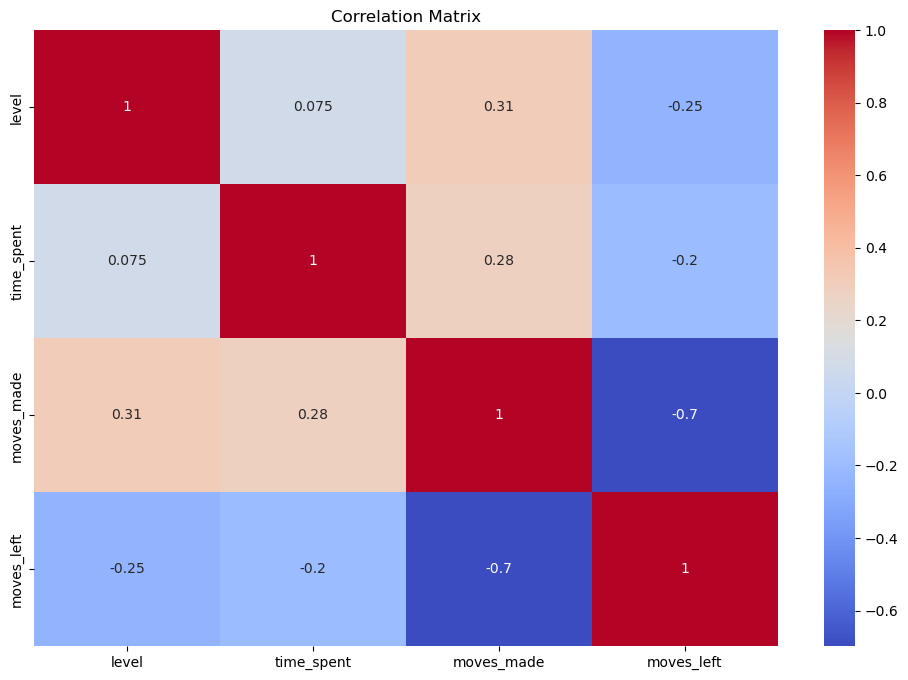

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# (This step has already been done, so we'll work with the 'sampled_df' DataFrame)

# Check data types and missing values
print(sampled_df.info())

# Get basic statistical summaries
print(sampled_df.describe())

# Calculate and visualize the correlation between variables
correlation_matrix = sampled_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


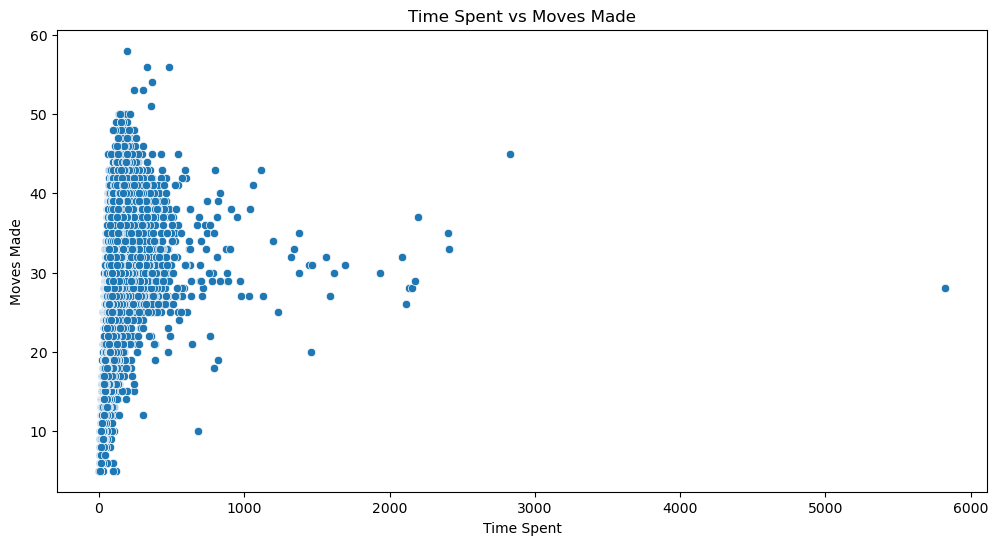

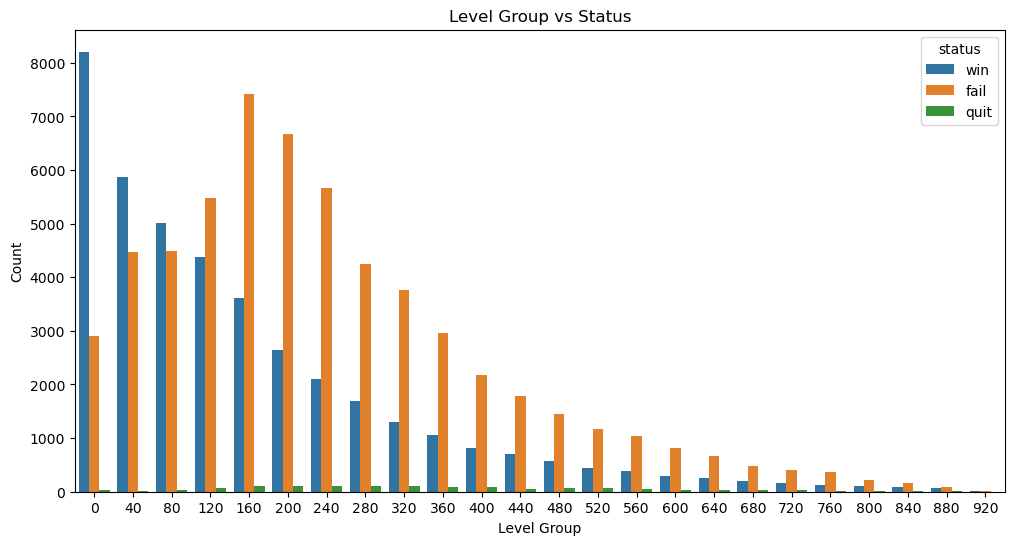

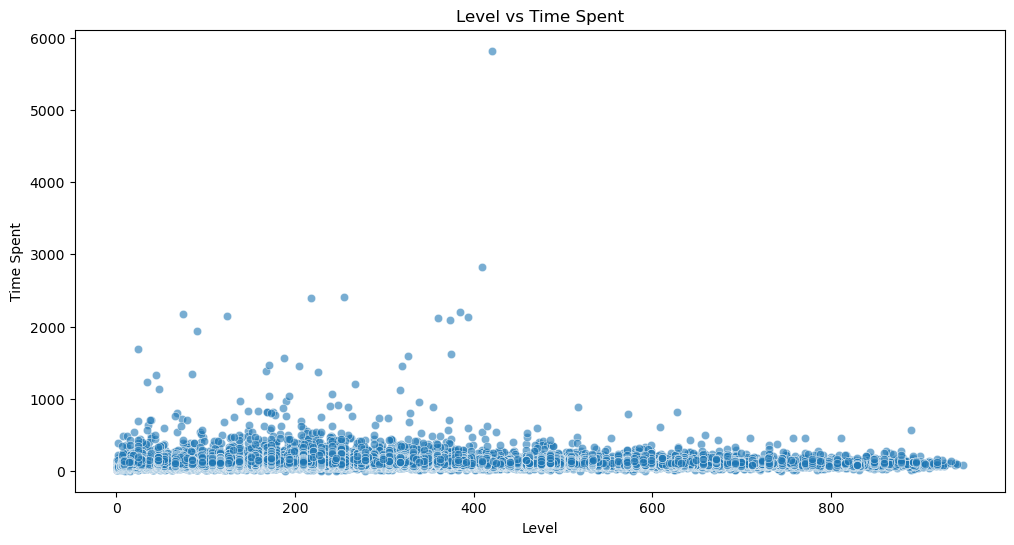

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# (This step has already been done, so we'll work with the 'sampled_df' DataFrame)

# Filter time_spent values to the 0-6000 range
filtered_df = sampled_df[sampled_df['time_spent'] <= 6000]

# Examine the relationship between time_spent and moves_made
plt.figure(figsize=(12, 6))
sns.scatterplot(x='time_spent', y='moves_made', data=filtered_df)
plt.title('Time Spent vs Moves Made')
plt.xlabel('Time Spent')
plt.ylabel('Moves Made')
plt.show()

# Examine the relationship between level and status by grouping levels in 40s
sampled_df['level_group'] = (sampled_df['level'] // 40) * 40
plt.figure(figsize=(12, 6))
sns.countplot(x='level_group', hue='status', data=sampled_df)
plt.title('Level Group vs Status')
plt.xlabel('Level Group')
plt.ylabel('Count')
plt.show()

# Examine the relationship between level and time_spent using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='level', y='time_spent', data=filtered_df, alpha=0.6)
plt.title('Level vs Time Spent')
plt.xlabel('Level')
plt.ylabel('Time Spent')
plt.show()


<Figure size 1400x800 with 0 Axes>

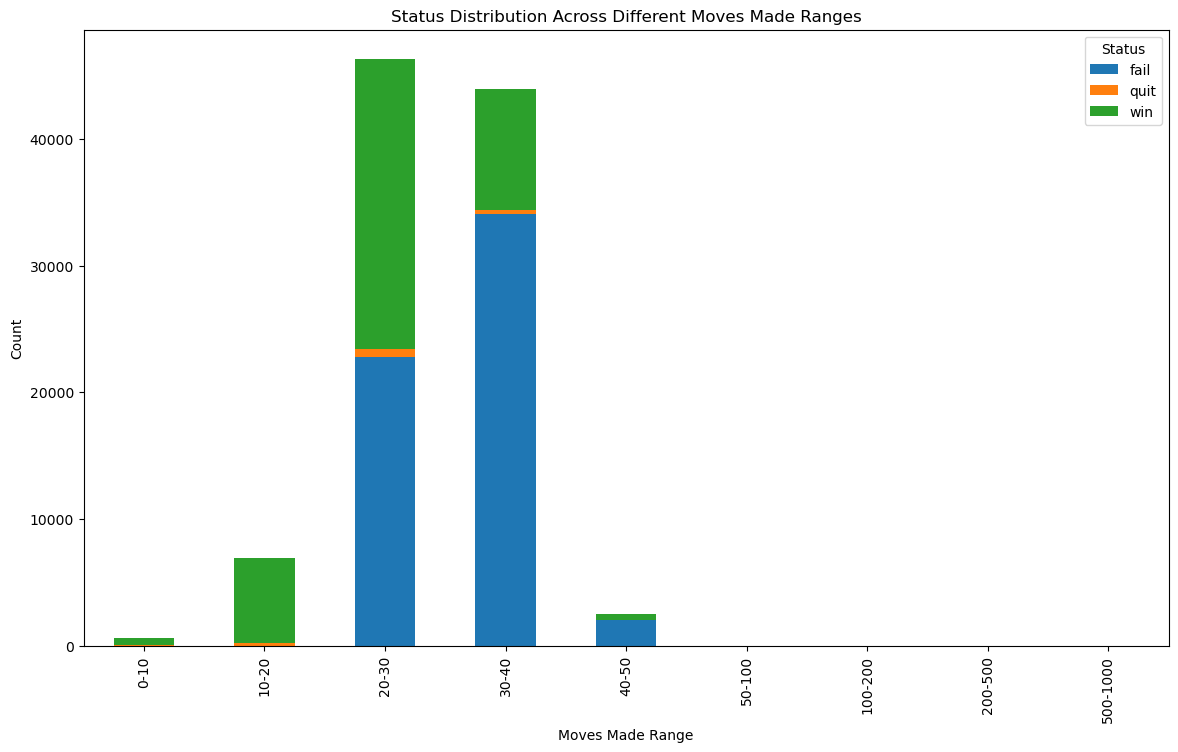

<Figure size 1400x800 with 0 Axes>

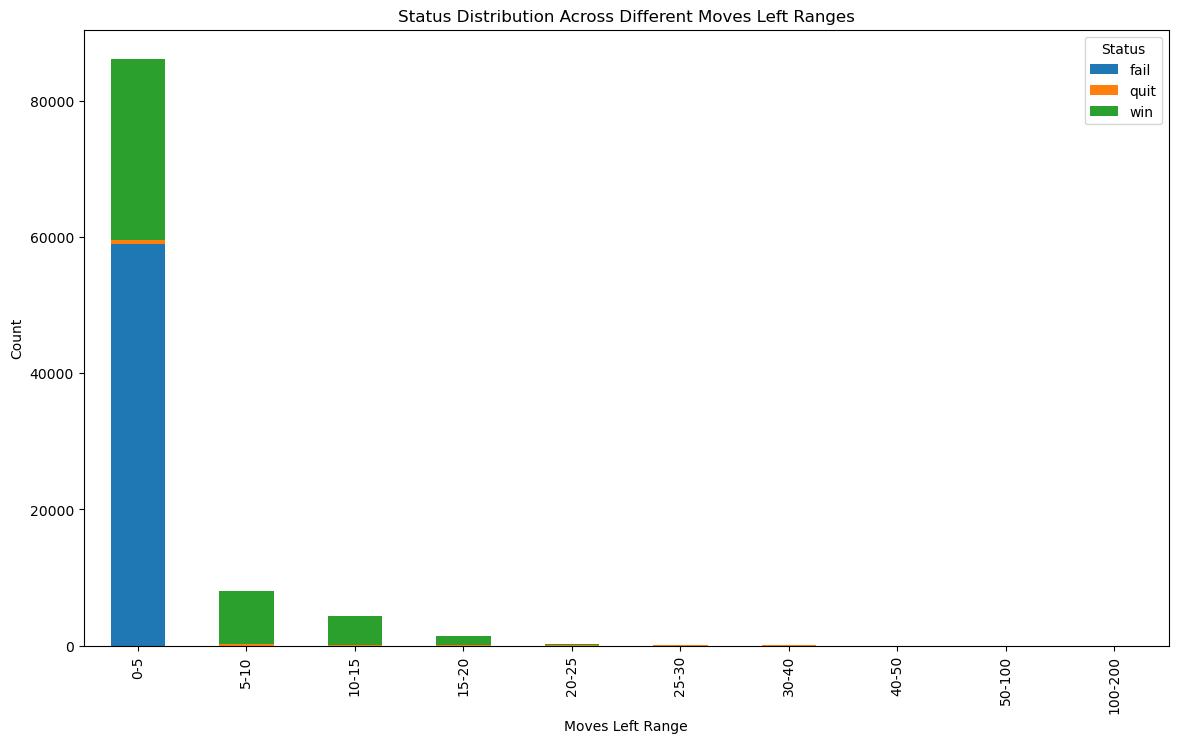

In [13]:
# Bin the Moves_made values into intervals
bins = [0, 10, 20, 30, 40, 50, 100, 200, 500, 1000]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-500', '500-1000']
sampled_df['moves_made_bin'] = pd.cut(sampled_df['moves_made'], bins=bins, labels=labels, include_lowest=True)

# Examine the status distribution for each interval
plt.figure(figsize=(14, 8))
status_counts = sampled_df.groupby(['moves_made_bin', 'status']).size().unstack().fillna(0)
status_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Status Distribution Across Different Moves Made Ranges')
plt.xlabel('Moves Made Range')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

# Bin the Moves_left values into intervals
bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 100, 200]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-40', '40-50', '50-100', '100-200']
sampled_df['moves_left_bin'] = pd.cut(sampled_df['moves_left'], bins=bins, labels=labels, include_lowest=True)

# Examine the status distribution for each interval
plt.figure(figsize=(14, 8))
status_counts = sampled_df.groupby(['moves_left_bin', 'status']).size().unstack().fillna(0)
status_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Status Distribution Across Different Moves Left Ranges')
plt.xlabel('Moves Left Range')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()


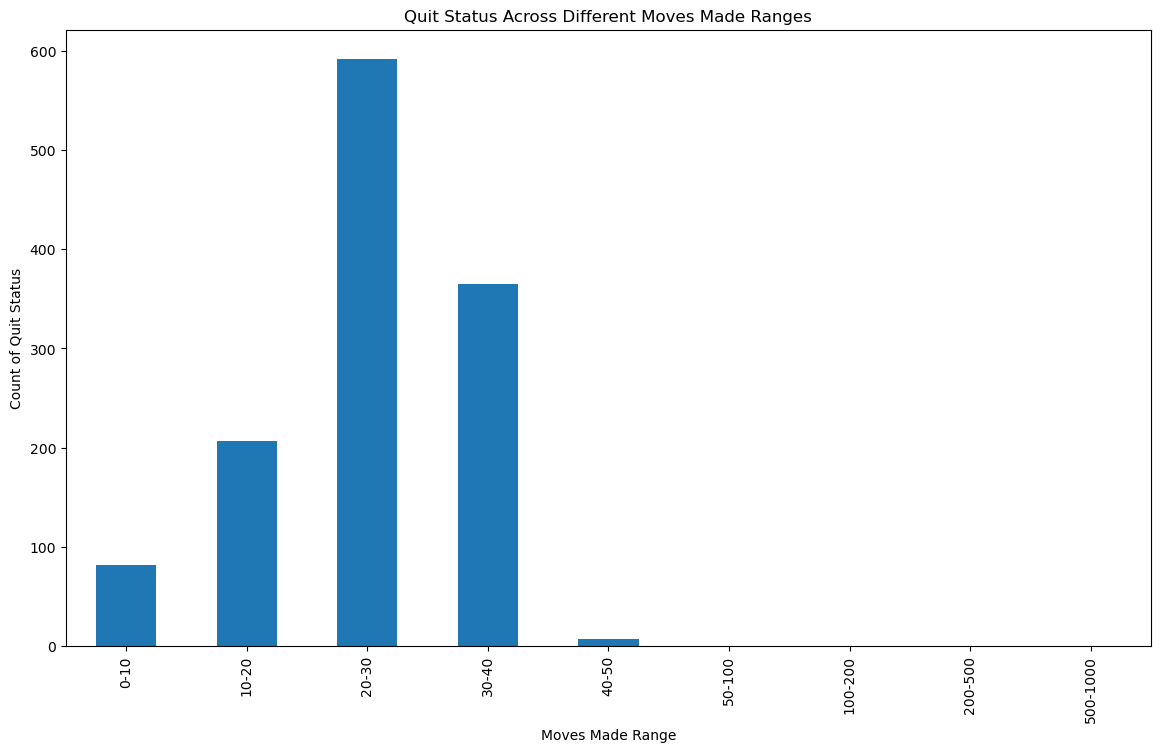

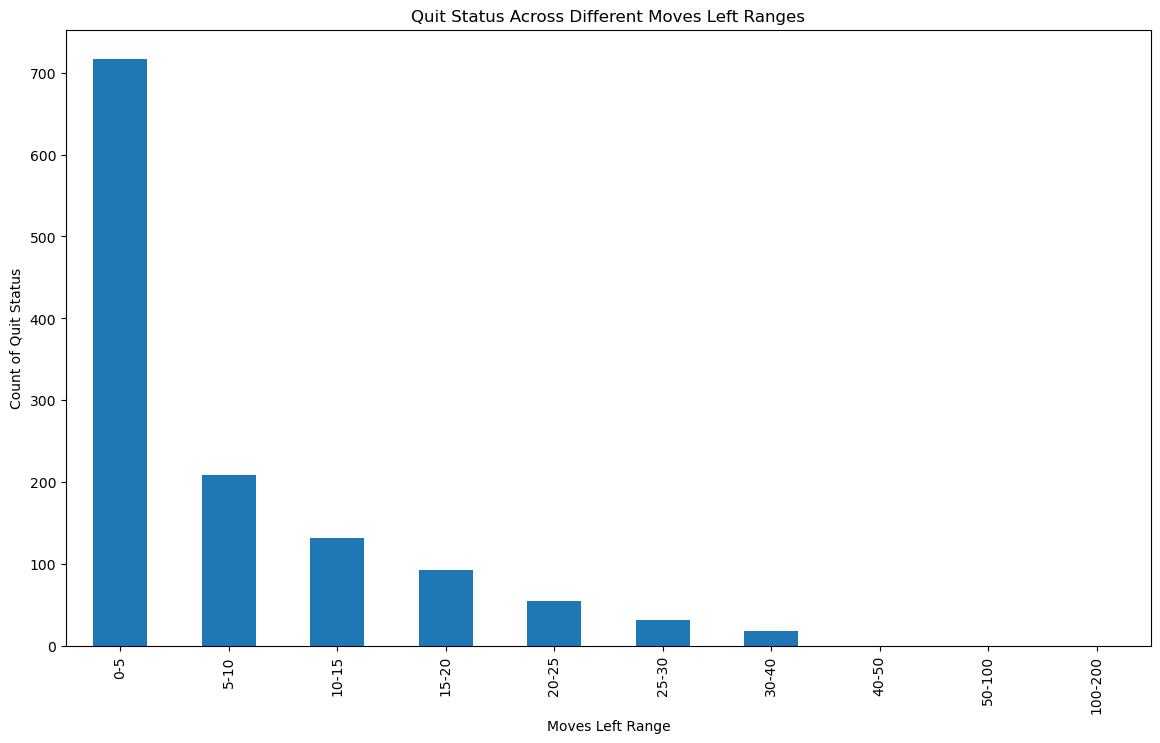

In [14]:
# Bin the Moves_made values into intervals
bins = [0, 10, 20, 30, 40, 50, 100, 200, 500, 1000]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-500', '500-1000']
sampled_df['moves_made_bin'] = pd.cut(sampled_df['moves_made'], bins=bins, labels=labels, include_lowest=True)

# Examine the quit status for each interval
quit_counts = sampled_df[sampled_df['status'] == 'quit'].groupby('moves_made_bin').size()

plt.figure(figsize=(14, 8))
quit_counts.plot(kind='bar')
plt.title('Quit Status Across Different Moves Made Ranges')
plt.xlabel('Moves Made Range')
plt.ylabel('Count of Quit Status')
plt.show()

# Bin the Moves_left values into intervals
bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 100, 200]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-40', '40-50', '50-100', '100-200']
sampled_df['moves_left_bin'] = pd.cut(sampled_df['moves_left'], bins=bins, labels=labels, include_lowest=True)

# Examine the quit status for each interval
quit_counts = sampled_df[sampled_df['status'] == 'quit'].groupby('moves_left_bin').size()

plt.figure(figsize=(14, 8))
quit_counts.plot(kind='bar')
plt.title('Quit Status Across Different Moves Left Ranges')
plt.xlabel('Moves Left Range')
plt.ylabel('Count of Quit Status')
plt.show()


<Figure size 1400x800 with 0 Axes>

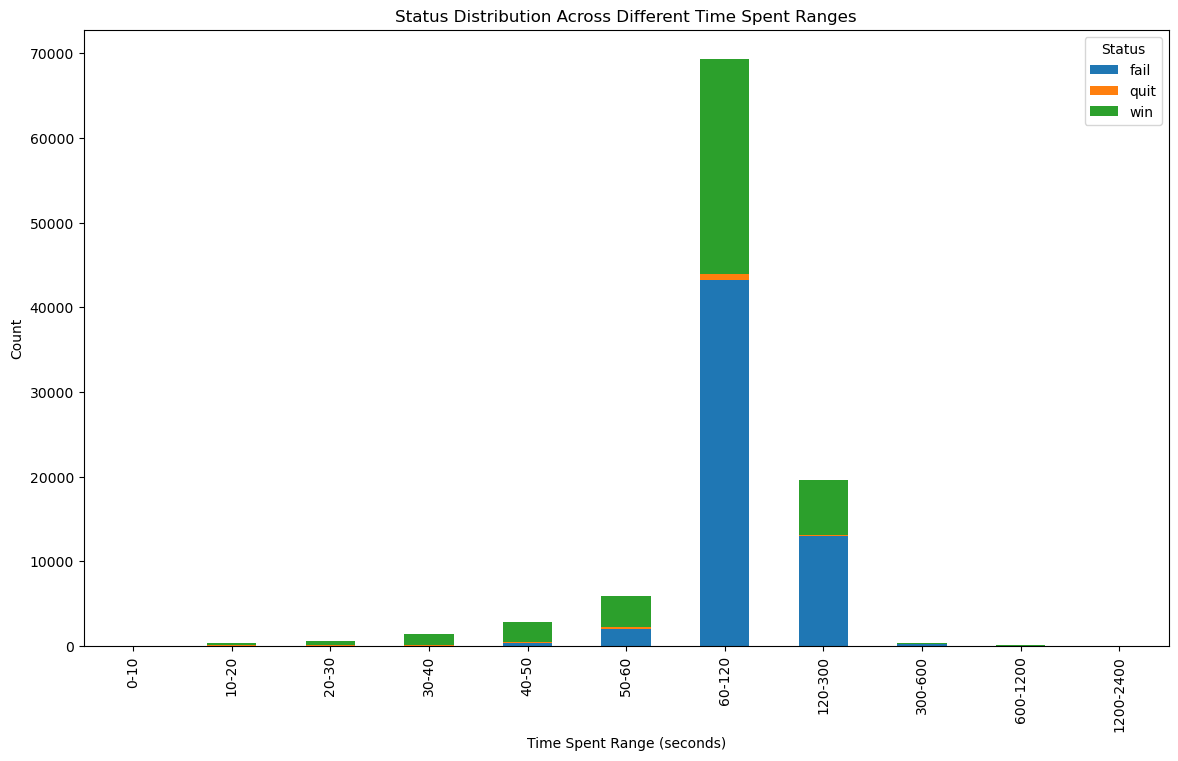

In [15]:
# Bin the time_spent values into intervals
bins = [0, 10, 20, 30, 40, 50, 60, 120, 300, 600, 1200, 2400]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-120', '120-300', '300-600', '600-1200', '1200-2400']
sampled_df['time_spent_bin'] = pd.cut(sampled_df['time_spent'], bins=bins, labels=labels, include_lowest=True)

# Examine the status distribution for each interval
plt.figure(figsize=(14, 8))
status_counts = sampled_df.groupby(['time_spent_bin', 'status']).size().unstack().fillna(0)
status_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Status Distribution Across Different Time Spent Ranges')
plt.xlabel('Time Spent Range (seconds)')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()
